# Renting Houses Prices Prediction

The aim of this notebook is to create a model for predicting the price of offered renting houses.  

### 1. Preparing the environment

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression, SGDRegressor, Lasso

In [2]:
!head data/total_data.csv

head: cannot open 'data/total_data.csv' for reading: No such file or directory


In [3]:
df = pd.read_csv('data/train.csv')

df.head()

/tmp/ipykernel_17877/1601996378.py:1: DtypeWarning: Columns (0,21,24,29) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('data/train.csv')


,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,beds,extra_people,minimum_nights,number_of_reviews,instant_bookable,amenities,property_type,room_type,cancellation_policy,price
0,947924,https://www.airbnb.com/rooms/947924,2.018082e+13,2018-08-16,LARGE LOVELY ROOM GREAT FOR GROUPS,NaN,This large lovely room is perfect for any grou...,This large lovely room is perfect for any grou...,none,NaN,...,4.0,$82.00,1,4.0,f,"{Internet,Wifi,Kitchen,""Free parking on premis...",House,Private room,strict_14_with_grace_period,$229.00
1,2747040,https://www.airbnb.com/rooms/2747040,2.019072e+13,2019-07-16,Alugo para a Copa do mundo,"Excelente apto, localizado a 500 metros de dis...",NaN,"Excelente apto, localizado a 500 metros de dis...",none,NaN,...,3.0,$0.00,10,0.0,f,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",Apartment,Entire home/apt,moderate,"$1,502.00"
2,13734316,https://www.airbnb.com/rooms/13734316,2.018112e+13,2018-11-15,Apartamento para temporada,Meu espaço é perto de Vila olímpica dos atleta...,NaN,Meu espaço é perto de Vila olímpica dos atleta...,none,NaN,...,3.0,$0.00,30,0.0,t,"{TV,""Air conditioning"",Pool,Kitchen,""Free park...",Apartment,Entire home/apt,flexible,$569.00
3,30979175,https://www.airbnb.com/rooms/30979175,2.019092e+13,2019-09-24,2-Ensuite flat with stunning sea view!,Enjoy the most beautiful sight of Recreio dos ...,The flat is newly refurbished and has a modern...,Enjoy the most beautiful sight of Recreio dos ...,none,NaN,...,4.0,$75.00,2,20.0,f,"{TV,""Cable TV"",Wifi,""Air conditioning"",Pool,Ki...",Apartment,Entire home/apt,moderate,$499.00
4,3742926,https://www.airbnb.com/rooms/3742926,2.018121e+13,2018-12-14,Condomino,"Rio-Stadtteil JACAREPAGUA-CURICICA, kein Touri...",NaN,"Rio-Stadtteil JACAREPAGUA-CURICICA, kein Touri...",none,NaN,...,3.0,$88.00,7,0.0,f,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",House,Private room,flexible,$132.00


### 2. Data pre-processing

In this section, the necessary columns should be selected, cleaned and must be in the correct type. The categorical columns should be treated. We will start by analysing the dataset and removing missing data and duplicates.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 588091 entries, 0 to 588090
Data columns (total 37 columns):
 #   Column                                        Non-Null Count   Dtype  
---  ------                                        --------------   -----  
 0   id                                            588091 non-null  object 
 1   listing_url                                   588091 non-null  object 
 2   scrape_id                                     588090 non-null  float64
 3   last_scraped                                  588091 non-null  object 
 4   name                                          586971 non-null  object 
 5   summary                                       558441 non-null  object 
 6   space                                         355819 non-null  object 
 7   description                                   574567 non-null  object 
 8   experiences_offered                           588091 non-null  object 
 9   neighborhood_overview                         31

In [5]:
# remove columns that will not be used in this analysis
unused_cols = ['listing_url', 'last_scraped', 'name', 'summary', 'space', 'description', 'neighborhood_overview', 'experiences_offered',
               'minimum_minimum_nights', 'maximum_minimum_nights', 'minimum_maximum_nights', 'maximum_maximum_nights', 'minimum_nights_avg_ntm', 
               'maximum_nights_avg_ntm', 'calculated_host_listings_count_entire_homes', 'calculated_host_listings_count_private_rooms', 'calculated_host_listings_count_shared_rooms',
               'cancellation_policy', 'number_of_reviews_ltm', 'number_of_reviews', 'scrape_id', 'minimum_nights']

df.drop(columns=unused_cols, inplace=True)

In [6]:
# get the number of missing data points per column
missing_values_count = df.isnull().sum()

print(missing_values_count)

id                        0
host_is_superhost       294
host_listings_count     294
latitude                  0
longitude                 0
accommodates              0
bathrooms              1126
bedrooms                592
beds                   1759
extra_people              0
instant_bookable          1
amenities                 0
property_type             0
room_type                 0
price                     0
dtype: int64


In [7]:
total_cells = np.product(df.shape)
total_missing = missing_values_count.sum()

# percent of data that is missing
percent_missing = (total_missing/total_cells) * 100
print(percent_missing)

0.04609263985789048


In [8]:
# drop missing values
df.dropna(inplace=True)

In [9]:
# dropping duplicates
df.drop_duplicates(inplace=True)

In [10]:
# check the new dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 437321 entries, 0 to 588086
Data columns (total 15 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   437321 non-null  object 
 1   host_is_superhost    437321 non-null  object 
 2   host_listings_count  437321 non-null  object 
 3   latitude             437321 non-null  float64
 4   longitude            437321 non-null  float64
 5   accommodates         437321 non-null  object 
 6   bathrooms            437321 non-null  float64
 7   bedrooms             437321 non-null  float64
 8   beds                 437321 non-null  float64
 9   extra_people         437321 non-null  object 
 10  instant_bookable     437321 non-null  object 
 11  amenities            437321 non-null  object 
 12  property_type        437321 non-null  object 
 13  room_type            437321 non-null  object 
 14  price                437321 non-null  object 
dtypes: float64(5), object(

In [11]:
# get the new missing values count
missing_values_count = df.isnull().sum()

print(missing_values_count)

id                     0
host_is_superhost      0
host_listings_count    0
latitude               0
longitude              0
accommodates           0
bathrooms              0
bedrooms               0
beds                   0
extra_people           0
instant_bookable       0
amenities              0
property_type          0
room_type              0
price                  0
dtype: int64


In [12]:
# Get all non-numeric columns
non_numeric_columns = df.select_dtypes(exclude='number')
print(non_numeric_columns.columns)

Index(['id', 'host_is_superhost', 'host_listings_count', 'accommodates',
       'extra_people', 'instant_bookable', 'amenities', 'property_type',
       'room_type', 'price'],
      dtype='object')


In [13]:
non_numeric_columns.head()

,id,host_is_superhost,host_listings_count,accommodates,extra_people,instant_bookable,amenities,property_type,room_type,price
0,947924,f,5.0,6,$82.00,f,"{Internet,Wifi,Kitchen,""Free parking on premis...",House,Private room,$229.00
1,2747040,f,1.0,5,$0.00,f,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",Apartment,Entire home/apt,"$1,502.00"
2,13734316,f,1.0,4,$0.00,t,"{TV,""Air conditioning"",Pool,Kitchen,""Free park...",Apartment,Entire home/apt,$569.00
3,30979175,t,1.0,5,$75.00,f,"{TV,""Cable TV"",Wifi,""Air conditioning"",Pool,Ki...",Apartment,Entire home/apt,$499.00
4,3742926,f,2.0,4,$88.00,f,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",House,Private room,$132.00


Now, we will change the data types of each column to its correct type

In [14]:
# check the data types of each column
df.dtypes

id                      object
host_is_superhost       object
host_listings_count     object
latitude               float64
longitude              float64
accommodates            object
bathrooms              float64
bedrooms               float64
beds                   float64
extra_people            object
instant_bookable        object
amenities               object
property_type           object
room_type               object
price                   object
dtype: object

The ```host_listings_count```, ```bathrooms```, ```bedrooms```, `price` and ```beds``` columns must transformed into integer

In [15]:
df['host_listings_count'] = df['host_listings_count'].astype(np.float64, copy=False)
df['host_listings_count'] = df['host_listings_count'].astype(np.int16, copy=False)
df['accommodates'] = df['accommodates'].astype(np.int16, copy=False)
df['bathrooms'] = df['bathrooms'].astype(np.int16, copy=False)
df['bedrooms'] = df['bedrooms'].astype(np.int16, copy=False)
df['beds'] = df['beds'].astype(np.int16, copy=False)

The `extra_people` and `price` columns need to be parsed 

In [16]:
df['extra_people'] = df['extra_people'].str.replace('$', '', regex=False)
df['extra_people'] = df['extra_people'].str.replace(',', '', regex=False)
df['extra_people'] = df['extra_people'].astype(np.float32, copy=False)

df['price'] = df['price'].str.replace('$', '', regex=False)
df['price'] = df['price'].str.replace(',', '', regex=False)
df['price'] = df['price'].astype(np.float32, copy=False)

### 3. Processing the data

### 3.1 Exploratory Analysis and Data Cleaning

In [17]:
# checking the last changes
df.head()

,id,host_is_superhost,host_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,beds,extra_people,instant_bookable,amenities,property_type,room_type,price
0,947924,f,5,-22.935381,-43.199022,6,1,1,4,82.0,f,"{Internet,Wifi,Kitchen,""Free parking on premis...",House,Private room,229.0
1,2747040,f,1,-22.912320,-43.219480,5,1,3,3,0.0,f,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",Apartment,Entire home/apt,1502.0
2,13734316,f,1,-22.965607,-43.409884,4,1,2,3,0.0,t,"{TV,""Air conditioning"",Pool,Kitchen,""Free park...",Apartment,Entire home/apt,569.0
3,30979175,t,1,-23.030740,-43.477210,5,2,2,4,75.0,f,"{TV,""Cable TV"",Wifi,""Air conditioning"",Pool,Ki...",Apartment,Entire home/apt,499.0
4,3742926,f,2,-22.949252,-43.388894,4,2,2,3,88.0,f,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",House,Private room,132.0


For the detection of outliers in our data, we'll define a function for performing the Inter Quartile Range method

In [18]:
def detect_outliers_iqr(data):
    outliers = []
    data = sorted(data)
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    IQR = q3-q1
    lwr_bound = q1-(1.5*IQR)
    upr_bound = q3+(1.5*IQR)
    for i in data: 
        if (i<lwr_bound or i>upr_bound):
            outliers.append(i)
    return outliers

#### host_is_superhost and instant_bookable

The `host_is_superhost` and `instant_bookable` categorical columns need to be encoded

In [19]:
# encode the host_is_superhost column
for col in ['host_is_superhost', 'instant_bookable']:
    df.loc[df[col] == 'f', col] = 0 
    df.loc[df[col] == 't', col] = 1
    df[col] = df[col].astype(np.int16) 

df.head()

,id,host_is_superhost,host_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,beds,extra_people,instant_bookable,amenities,property_type,room_type,price
0,947924,0,5,-22.935381,-43.199022,6,1,1,4,82.0,0,"{Internet,Wifi,Kitchen,""Free parking on premis...",House,Private room,229.0
1,2747040,0,1,-22.912320,-43.219480,5,1,3,3,0.0,0,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",Apartment,Entire home/apt,1502.0
2,13734316,0,1,-22.965607,-43.409884,4,1,2,3,0.0,1,"{TV,""Air conditioning"",Pool,Kitchen,""Free park...",Apartment,Entire home/apt,569.0
3,30979175,1,1,-23.030740,-43.477210,5,2,2,4,75.0,0,"{TV,""Cable TV"",Wifi,""Air conditioning"",Pool,Ki...",Apartment,Entire home/apt,499.0
4,3742926,0,2,-22.949252,-43.388894,4,2,2,3,88.0,0,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",House,Private room,132.0


#### amenities

Since there is a lot of data in the `amenities` column, an approximation must be made in order to downsize the complexity of the analysis. 


The hypotesis that is beign used is that the quantity of amenities offered means a higher investment by the host in the property, wich increases its value.  

In [20]:
# create a new column n_amenities that represents the quantity of amenities
df['n_amenities'] = df['amenities'].str.split(',').apply(len)+1
df['n_amenities'] = df['n_amenities'].astype('int')
df.loc[df['amenities'] == '{}', 'n_amenities'] = 0
df = df.drop('amenities', axis=1)


In [21]:
df.head()

,id,host_is_superhost,host_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,beds,extra_people,instant_bookable,property_type,room_type,price,n_amenities
0,947924,0,5,-22.935381,-43.199022,6,1,1,4,82.0,0,House,Private room,229.0,9
1,2747040,0,1,-22.912320,-43.219480,5,1,3,3,0.0,0,Apartment,Entire home/apt,1502.0,17
2,13734316,0,1,-22.965607,-43.409884,4,1,2,3,0.0,1,Apartment,Entire home/apt,569.0,19
3,30979175,1,1,-23.030740,-43.477210,5,2,2,4,75.0,0,Apartment,Entire home/apt,499.0,32
4,3742926,0,2,-22.949252,-43.388894,4,2,2,3,88.0,0,House,Private room,132.0,33


In [22]:
# detecting outliers
outliers = detect_outliers_iqr(df['n_amenities'])

outliers

[41,
 41,
 41,
 41,
 41,
 41,
 41,
 41,
 41,
 41,
 41,
 41,
 41,
 41,
 41,
 41,
 41,
 41,
 41,
 41,
 41,
 41,
 41,
 41,
 41,
 41,
 41,
 41,
 41,
 41,
 41,
 41,
 41,
 41,
 41,
 41,
 41,
 41,
 41,
 41,
 41,
 41,
 41,
 41,
 41,
 41,
 41,
 41,
 41,
 41,
 41,
 41,
 41,
 41,
 41,
 41,
 41,
 41,
 41,
 41,
 41,
 41,
 41,
 41,
 41,
 41,
 41,
 41,
 41,
 41,
 41,
 41,
 41,
 41,
 41,
 41,
 41,
 41,
 41,
 41,
 41,
 41,
 41,
 41,
 41,
 41,
 41,
 41,
 41,
 41,
 41,
 41,
 41,
 41,
 41,
 41,
 41,
 41,
 41,
 41,
 41,
 41,
 41,
 41,
 41,
 41,
 41,
 41,
 41,
 41,
 41,
 41,
 41,
 41,
 41,
 41,
 41,
 41,
 41,
 41,
 41,
 41,
 41,
 41,
 41,
 41,
 41,
 41,
 41,
 41,
 41,
 41,
 41,
 41,
 41,
 41,
 41,
 41,
 41,
 41,
 41,
 41,
 41,
 41,
 41,
 41,
 41,
 41,
 41,
 41,
 41,
 41,
 41,
 41,
 41,
 41,
 41,
 41,
 41,
 41,
 41,
 41,
 41,
 41,
 41,
 41,
 41,
 41,
 41,
 41,
 41,
 41,
 41,
 41,
 41,
 41,
 41,
 41,
 41,
 41,
 41,
 41,
 41,
 41,
 41,
 41,
 41,
 41,
 41,
 41,
 41,
 41,
 41,
 41,
 41,
 41,
 41,
 41,
 41,
 41,


Now, we have to deal with the nominal data in the columns `property_type` and `room_type`

#### property_type

In [23]:
# get the quantity of unique values in property_type col
df['property_type'].unique()

array(['House', 'Apartment', 'Serviced apartment', 'Condominium', 'Loft',
       'Bed and breakfast', 'Guesthouse', 'Guest suite', 'Hostel',
       'Cottage', 'Aparthotel', 'Hotel', 'Other',
       'Casa particular (Cuba)', 'Houseboat', 'Nature lodge', 'Townhouse',
       'Villa', 'Castle', 'Tiny house', 'Earth house', 'Chalet', 'Cabin',
       'Barn', 'Dome house', 'Boat', 'Boutique hotel', 'Treehouse',
       'Bungalow', 'Campsite', 'Farm stay', 'Island', 'Dorm', 'Resort',
       'Tent', 'Hut', 'Yurt', 'Parking Space', 'Tipi', 'Camper/RV',
       'Plane', 'Vacation home', 'Casa particular', 'Train',
       'Pension (South Korea)', 'Igloo', 'Lighthouse'], dtype=object)

In [24]:
df['property_type'].value_counts()

property_type
Apartment                 334281
House                      43757
Condominium                21908
Serviced apartment         10761
Loft                        8542
Bed and breakfast           3048
Guest suite                 2501
Hostel                      2398
Guesthouse                  1648
Villa                       1418
Other                       1290
Hotel                        958
Townhouse                    888
Aparthotel                   843
Boutique hotel               478
Earth house                  379
Cottage                      358
Tiny house                   306
Chalet                       304
Boat                         239
Casa particular (Cuba)       210
Bungalow                     141
Nature lodge                 133
Cabin                        132
Castle                        74
Treehouse                     45
Farm stay                     40
Island                        39
Campsite                      28
Tent                         

For each property type that has <1000 registries, we will group them in a new category called "others"

In [25]:
# Get the values that appear less than 500 times
value_counts = df['property_type'].value_counts()
values_to_replace = value_counts[value_counts < 1000].index
df['property_type'] = df['property_type'].replace(values_to_replace, 'Other')

df['property_type'].value_counts()

property_type
Apartment             334281
House                  43757
Condominium            21908
Serviced apartment     10761
Loft                    8542
Other                   7059
Bed and breakfast       3048
Guest suite             2501
Hostel                  2398
Guesthouse              1648
Villa                   1418
Name: count, dtype: int64

<Axes: xlabel='property_type'>

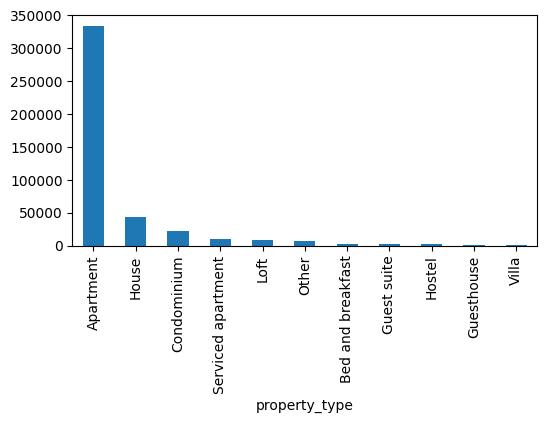

In [26]:
# plotting the distribution of property types 
df['property_type'].value_counts().plot(kind='bar', figsize=(6,3))

In [27]:
# encoding the column
encoder = LabelEncoder()

df['property_type'] = encoder.fit_transform(df['property_type'])

In [28]:
df['property_type'].value_counts()

property_type
0     334281
6      43757
2      21908
9      10761
7       8542
8       7059
1       3048
3       2501
5       2398
4       1648
10      1418
Name: count, dtype: int64

#### room_type

room_type
Entire home/apt    313256
Private room       112523
Shared room         10069
Hotel room           1473
Name: count, dtype: int64


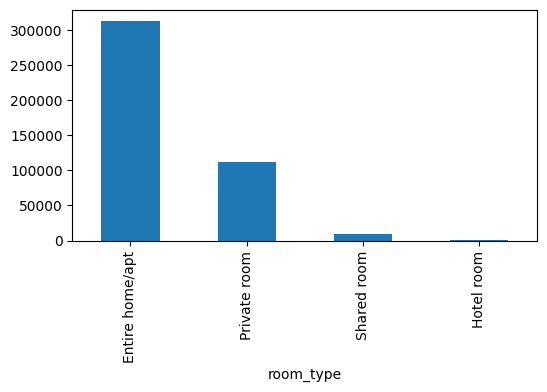

In [29]:
# analyse the distribution of data
df['room_type'].value_counts().plot(kind='bar', figsize=(6,3))
print(df['room_type'].value_counts())

Since there is not too much categories in this column, we will leave it as it is.

In [30]:
# encoding the column
encoder = LabelEncoder()

df['room_type'] = encoder.fit_transform(df['room_type'])

df['room_type'].value_counts()

room_type
0    313256
2    112523
3     10069
1      1473
Name: count, dtype: int64

In [31]:
df.head()

,id,host_is_superhost,host_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,beds,extra_people,instant_bookable,property_type,room_type,price,n_amenities
0,947924,0,5,-22.935381,-43.199022,6,1,1,4,82.0,0,6,2,229.0,9
1,2747040,0,1,-22.912320,-43.219480,5,1,3,3,0.0,0,0,0,1502.0,17
2,13734316,0,1,-22.965607,-43.409884,4,1,2,3,0.0,1,0,0,569.0,19
3,30979175,1,1,-23.030740,-43.477210,5,2,2,4,75.0,0,0,0,499.0,32
4,3742926,0,2,-22.949252,-43.388894,4,2,2,3,88.0,0,6,2,132.0,33


### 3.2 Detecting outliers

Text(0.5, 1.0, 'extra_people')

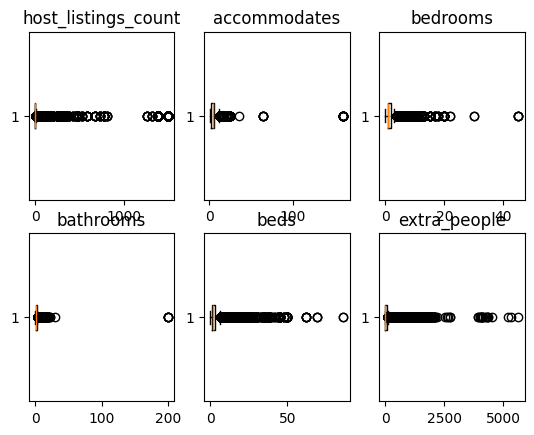

In [32]:
# plotting the boxplot of the columns not analysed yet
fig, axis = plt.subplots(2, 3)

# host_listings_count
axis[0,0].boxplot(df['host_listings_count'], vert=False)
axis[0,0].set_title("host_listings_count")

# accommodates
axis[0,1].boxplot(df['accommodates'], vert=False)
axis[0,1].set_title("accommodates")

# bedrooms
axis[0,2].boxplot(df['bedrooms'], vert=False)
axis[0,2].set_title("bedrooms")

# bathrooms
axis[1,0].boxplot(df['bathrooms'], vert=False)
axis[1,0].set_title("bathrooms")

# beds
axis[1,1].boxplot(df['beds'], vert=False)
axis[1,1].set_title("beds")

# extra_people
axis[1,2].boxplot(df['extra_people'], vert=False)
axis[1,2].set_title("extra_people")

In [33]:
# detecting outliers

outliers_host_listings_count = detect_outliers_iqr(df['host_listings_count'])
df = df[~df['host_listings_count'].isin(outliers_host_listings_count)]
df = df[~df['host_listings_count'].isin(outliers_host_listings_count)]

outliers_accommodates = detect_outliers_iqr(df['accommodates'])
df = df[~df['accommodates'].isin(outliers_accommodates)]

outliers_bedrooms = detect_outliers_iqr(df['bedrooms'])
df = df[~df['bedrooms'].isin(outliers_bedrooms)]

outliers_bathrooms = detect_outliers_iqr(df['bathrooms'])
df = df[~df['bathrooms'].isin(outliers_bathrooms)]

outliers_beds = detect_outliers_iqr(df['beds'])
df = df[~df['beds'].isin(outliers_beds)]

outliers_extra_people = detect_outliers_iqr(df['extra_people'])
df = df[~df['extra_people'].isin(outliers_extra_people)]


Text(0.5, 1.0, 'extra_people')

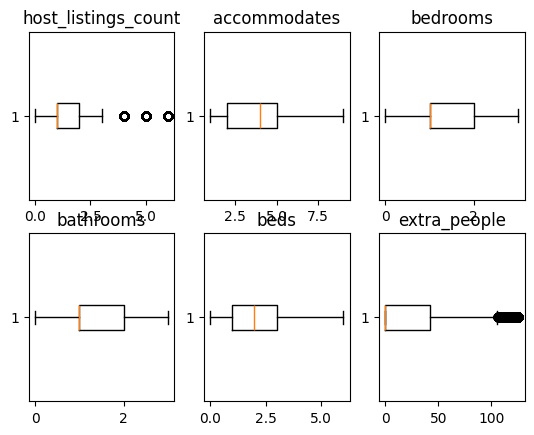

In [34]:
# plotting the boxplot of the columns without outliers
fig, axis = plt.subplots(2, 3)

# host_listings_count
axis[0,0].boxplot(df['host_listings_count'], vert=False)
axis[0,0].set_title("host_listings_count")

# accommodates
axis[0,1].boxplot(df['accommodates'], vert=False)
axis[0,1].set_title("accommodates")

# bedrooms
axis[0,2].boxplot(df['bedrooms'], vert=False)
axis[0,2].set_title("bedrooms")

# bathrooms
axis[1,0].boxplot(df['bathrooms'], vert=False)
axis[1,0].set_title("bathrooms")

# beds
axis[1,1].boxplot(df['beds'], vert=False)
axis[1,1].set_title("beds")

# extra_people
axis[1,2].boxplot(df['extra_people'], vert=False)
axis[1,2].set_title("extra_people")

### 4. Training

The first step is to define a function for evaluation

In [35]:
df.isnull().sum()

id                     0
host_is_superhost      0
host_listings_count    0
latitude               0
longitude              0
accommodates           0
bathrooms              0
bedrooms               0
beds                   0
extra_people           0
instant_bookable       0
property_type          0
room_type              0
price                  0
n_amenities            0
dtype: int64

Finally, we'll make some predictions using tree different algorithms.

In [36]:
def evaluate(model_name, y_test, predictions):
    RMSE = np.sqrt(mean_squared_error(y_test, predictions))
    MAE = mean_absolute_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    return f'model: {model_name}\nMean Absolute Error: {MAE}\nRoot Mean Square Error: {RMSE}\nR² Score: {round(r2*100, 2)}% \n---------------------------' 

In [37]:
y = df['price']
columns_dropped =  ['price']
models = {'Lasso':Lasso(),
          'Linear Regression': LinearRegression(),
          'sgdregressor' : SGDRegressor()}

X = df.drop(columns_dropped, axis=1)
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=1)
name = 'Extra Trees Regressor'
for name, model in models.items():
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    print(evaluate(name, y_test, predictions))

model: Lasso
Mean Absolute Error: 346.9302456532617
Root Mean Square Error: 1124.2806380134712
R² Score: 8.23% 
---------------------------
model: Linear Regression
Mean Absolute Error: 346.09539407128324
Root Mean Square Error: 1123.809379674302
R² Score: 8.31% 
---------------------------
model: sgdregressor
Mean Absolute Error: 3.653650641997869e+21
Root Mean Square Error: 4.354972796590976e+21
R² Score: -1.3769284997870488e+39% 
---------------------------
